# 20220515 Initial Analysis

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
from astropy.table import Table, Column
from astropy.io import fits
import numpy as np
from importlib import reload
from imaka.analysis import plot_stats
from imaka.analysis import plot_redu
from imaka.reduce import util
from imaka.analysis import fourfilt
from astropy.stats import sigma_clipped_stats

import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import seaborn as sns

import imaka.analysis.moffat as moffat
## Edit Me
from imaka.reduce.nights import reduce_2022_05_15 as redu
night = '20220515'
fld = 'Fld2'

root_dir = redu.root_dir
stats_dir = root_dir + "reduce/stats/"
plots_dir = root_dir + "reduce/plots/"
stack_dir = root_dir + "reduce/stacks/"

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
## Had an issue with stacking, the gfol
for key in list(redu.dict_images.keys()):
    for i in range(len(redu.dict_images[key])):
        img_num = redu.dict_images[key]
        suf = redu.dict_suffix[key]
        test_img_base = 'sta{img:03d}{suf:s}_scan'.format(img=img_num[i], suf=suf)
        
        stars = Table.read(root_dir + f'reduce/{fld}/' + test_img_base + '_clean_stars_stats_mdp.fits')
        print(f"key: {key} image {img_num[i]} stars: {len(stars)}")  

key: open image 3 stars: 1175
key: open image 6 stars: 1543
key: open image 9 stars: 1586
key: open image 12 stars: 1708
key: open image 15 stars: 1592
key: open image 18 stars: 271
key: open image 29 stars: 1793
key: open image 32 stars: 1526
key: open image 35 stars: 1670
key: open image 38 stars: 1781
key: open image 46 stars: 1122
key: open image 49 stars: 1470
key: open image 52 stars: 1573
key: open image 55 stars: 1244
key: open image 58 stars: 1638
key: open image 61 stars: 1153
key: open image 64 stars: 884
key: LS image 0 stars: 1213
key: LS image 1 stars: 1249
key: LS image 4 stars: 1685
key: LS image 5 stars: 1682
key: LS image 8 stars: 1849
key: LS image 11 stars: 2148
key: LS image 14 stars: 2098
key: LS image 17 stars: 2215
key: LS image 28 stars: 2589
key: LS image 31 stars: 2632
key: LS image 34 stars: 2455
key: LS image 37 stars: 2204
key: LS image 45 stars: 2131
key: LS image 48 stars: 2170
key: LS image 51 stars: 2027
key: LS image 54 stars: 1996
key: LS image 57 st

# 0. Plot: Single Image and starlists

In [4]:
# pick a file based on key
key = 'LS'
i = 0
#####
img_num = redu.dict_images[key]
suf = redu.dict_suffix[key]
test_img_base = 'sta{img:03d}{suf:s}_scan'.format(img=img_num[i], suf=suf)

50% EE radius = 0.550"


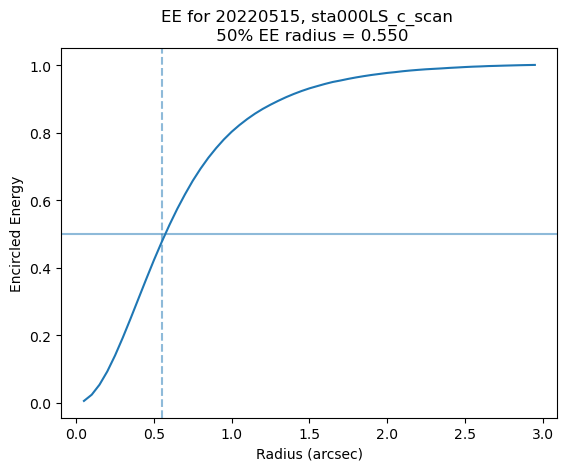

In [5]:
plot_redu.plot_ee_50(test_img_base, root_dir, fld, night)

/g/lu/data/imaka/onaga/20220515/sta/reduce/Fld2//sta000LS_c_scan_clean.fits


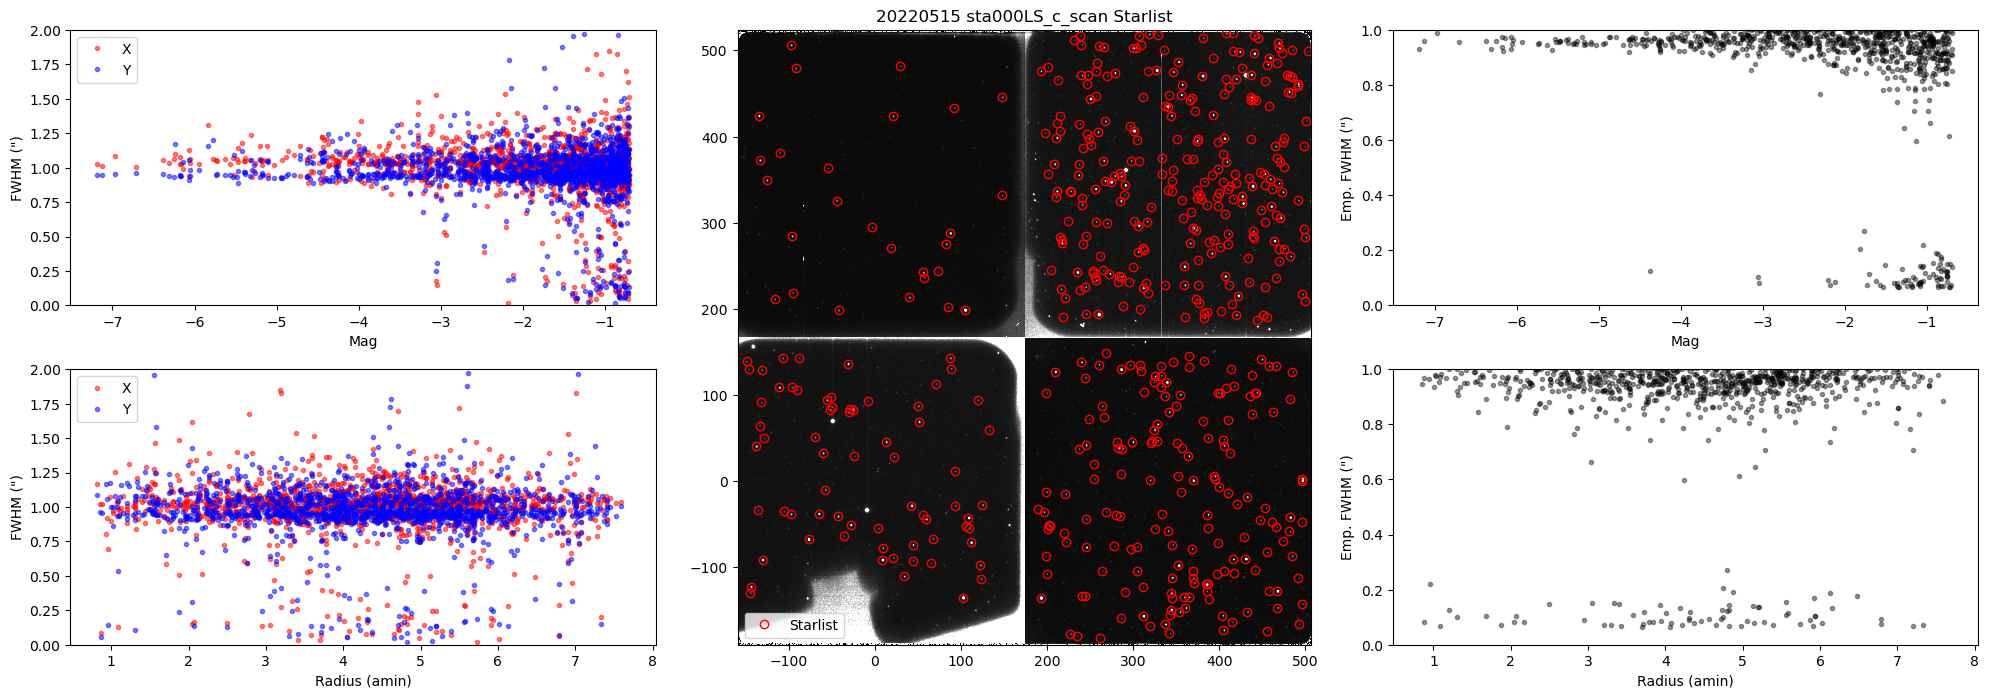

x: fwhm_x_avg = 1.02" fwhm_x_med = 1.02" fwhm_x_std = 0.10"
x: fwhm_x_avg = 1.02" fwhm_x_med = 1.02" fwhm_x_std = 0.10"


In [6]:
plot_redu.plot_starlist_stats(test_img_base, root_dir, fld, night)

In [7]:
from astropy import table
starlist = root_dir + 'reduce/Fld2/' + test_img_base + '_clean_stars_stats_mdp.fits'
stars = table.Table.read(starlist)

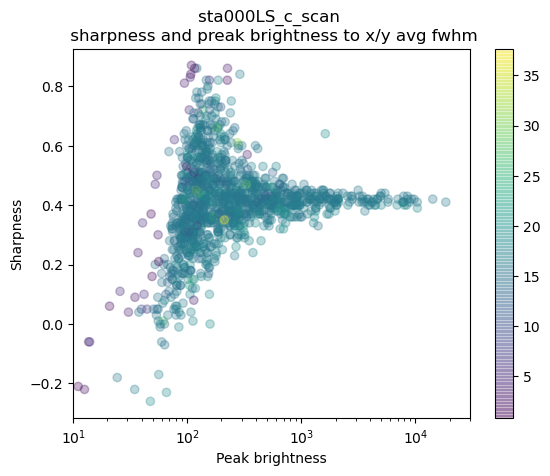

In [8]:
# num pix vs fwhm
plt.scatter(stars['peak'], stars['sharpness'], c=np.average([stars['x_fwhm'], stars['y_fwhm']], axis=0), alpha=0.3)
plt.xlim(10, 30000)
plt.xscale('log')
plt.xlabel("Peak brightness")
plt.ylabel("Sharpness")
plt.title(test_img_base+ " \n sharpness and preak brightness to x/y avg fwhm")
plt.colorbar()

# 1. Stat Plots
Various measures of starlists. These mostly depend on each individual sarlist having stats calculated.

## 1.1. Plot: Moffat profile summary

Beta vs. minor alpha and Beta vs. phi

In [9]:
stats = Table.read(root_dir + 'reduce/stats/stats_LS.fits')
print(stats.colnames)

['Image', 'starlist', 'FILTER', 'F_ORD', 'BINFAC', 'DATE_UTC', 'TIME_UTC', 'DATE_HST', 'TIME_HST', 'FWHM', 'FWHM_std', 'EE25', 'EE50', 'EE80', 'NEA', 'NEA2', 'xFWHM', 'yFWHM', 'theta', 'emp_fwhm', 'emp_fwhm_std', 'quadrant', 'Index', 'N Stars', 'N Sky', 'N Sky std', 'Amplitude', 'Amplitude std', 'Phi', 'Phi std', 'Beta', 'Beta std', 'Minor Alpha', 'Minor Alpha std', 'Major Alpha', 'Major Alpha std']


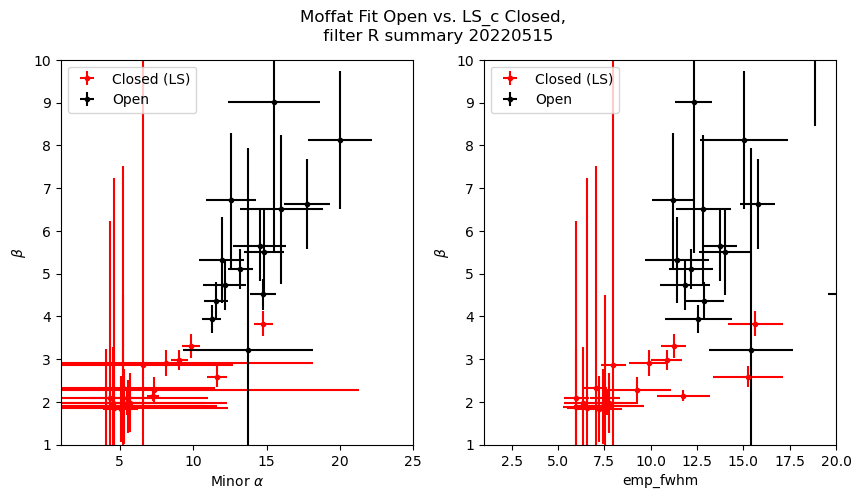

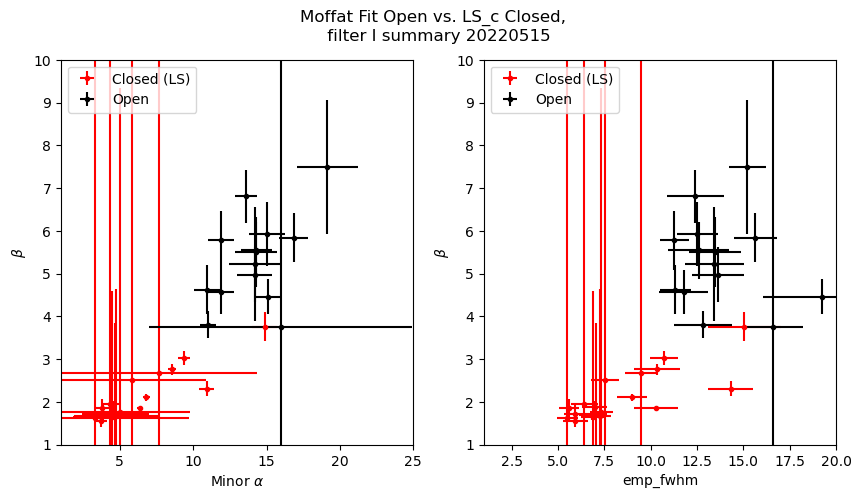

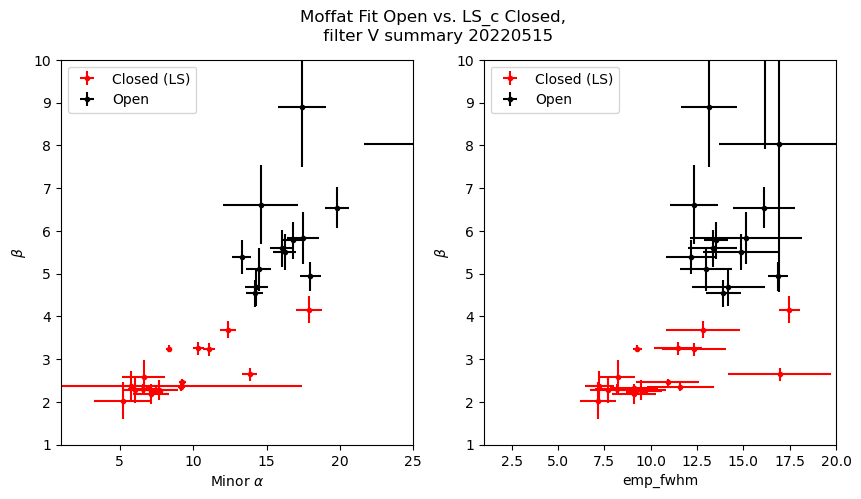

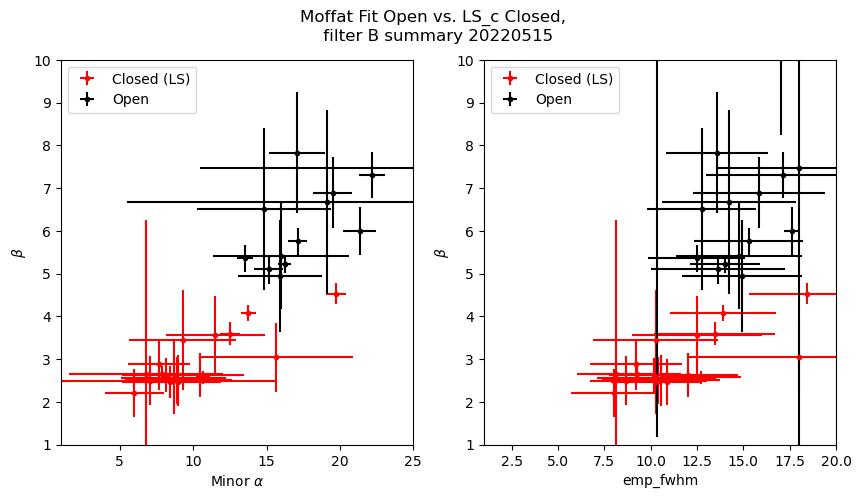

In [10]:
c_key = "LS_c"
plot_redu.plot_moffat_fit_4F("R", root_dir, c_key, fld, night)
plot_redu.plot_moffat_fit_4F("I", root_dir, c_key, fld, night)
plot_redu.plot_moffat_fit_4F("V", root_dir, c_key, fld, night)
plot_redu.plot_moffat_fit_4F("B", root_dir, c_key, fld, night)

### Beta vs. Mag on Stacks

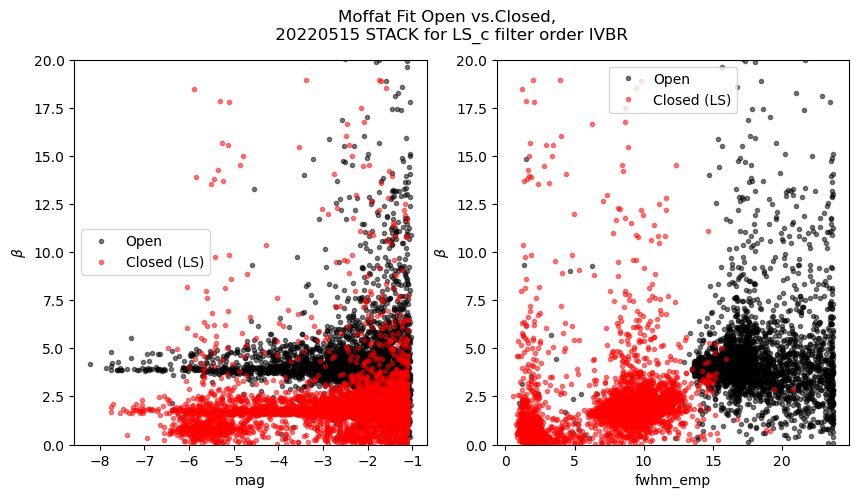

In [11]:
plot_redu.plot_beta_mag_4F_stacks(redu, filt_key = "IVBR")

## Beta vs. FWHM for wavelength

In [116]:
# source: https://www.mit.edu/~iancross/python/_modules/analysis.html#medianr
def removeoutliers(data, nsigma, remove='both', center='mean', niter=Inf, retind=False, verbose=False):
    """Strip outliers from a dataset, iterating until converged.

    :INPUT:
      data -- 1D numpy array.  data from which to remove outliers.

      nsigma -- positive number.  limit defining outliers: number of
                standard deviations from center of data.

    :OPTIONAL INPUTS:               
      remove -- ('min'|'max'|'both') respectively removes outliers
                 below, above, or on both sides of the limits set by
                 nsigma.

      center -- ('mean'|'median'|value) -- set central value, or
                 method to compute it.

      niter -- number of iterations before exit; defaults to Inf,
               which can occasionally result in empty arrays returned

      retind -- (bool) whether to return index of good values as
                second part of a 2-tuple.

    :EXAMPLE: 
       ::

           from numpy import hist, linspace, randn
           from analysis import removeoutliers
           data = randn(1000)
           hbins = linspace(-5,5,50)
           d2 = removeoutliers(data, 1.5, niter=1)
           hist(data, hbins)
           hist(d2, hbins)

       """
    # 2009-09-04 13:24 IJC: Created
    # 2009-09-24 17:34 IJC: Added 'retind' feature.  Tricky, but nice!
    # 2009-10-01 10:40 IJC: Added check for stdev==0
    # 2009-12-08 15:42 IJC: Added check for isfinite

    from numpy import median, ones, isfinite

    def getcen(data, method):
        "Get central value of a 1D array (helper function)"
        if method.__class__==str:
            if method=='median':
                cen = median(data)
            else:
                cen = data.mean()
        else:
            cen = method
        return cen

    def getgoodindex(data, nsigma, center, stdev, remove):
        "Get number of outliers (helper function!)"
        if stdev==0:
            distance = data*0.0
        else:
            distance = (data-center)/stdev
        if remove=='min':
            goodind = distance>-nsigma
        elif remove=='max':
            goodind = distance<nsigma
        else:
            goodind = abs(distance)<=nsigma
        return goodind

    data = data.ravel().copy()

    ndat0 = len(data)
    ndat = len(data)
    iter=0
    goodind = ones(data.shape,bool)
    goodind *= isfinite(data)
    while ((ndat0<>ndat) or (iter==0)) and (iter<niter) and (ndat>0) :
        ndat0 = len(data[goodind])
        cen = getcen(data[goodind], center)
        stdev = data[goodind].std()
        thisgoodind = getgoodindex(data[goodind], nsigma, cen, stdev, remove)
        goodind[find(goodind)] = thisgoodind
        if verbose:
            print "cen>>",cen
            print "std>>",stdev
        ndat = len(data[goodind])
        iter +=1
        if verbose:
            print ndat0, ndat
    if retind:
        ret = data[goodind], goodind
    else:
        ret = data[goodind]
    return ret

SyntaxError: invalid syntax (1192736259.py, line 76)

In [ ]:
# Radial Cut Function
# input: as stats table, width, and cut from center
# output: the stats table with the non-center 

def radial_cut(stats, width, radius):

def outlier_filter(stats):

### $Beta$ vs FWHM, Individual images
This looks at the combined individual images and standard deviation on them. 

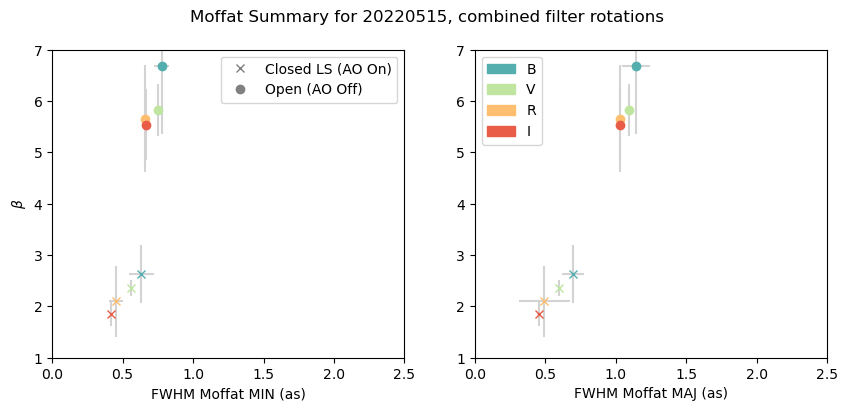

In [12]:
plot_redu.plot_fwhm_beta_4F_frames(redu, c_keys = ["LS_c", "_o"], xlim=[0,2.5])

### $Beta$ vs FWHM, Stacked images
This looks at the stackes images and standard deviation calculated in the moffat fitting. 

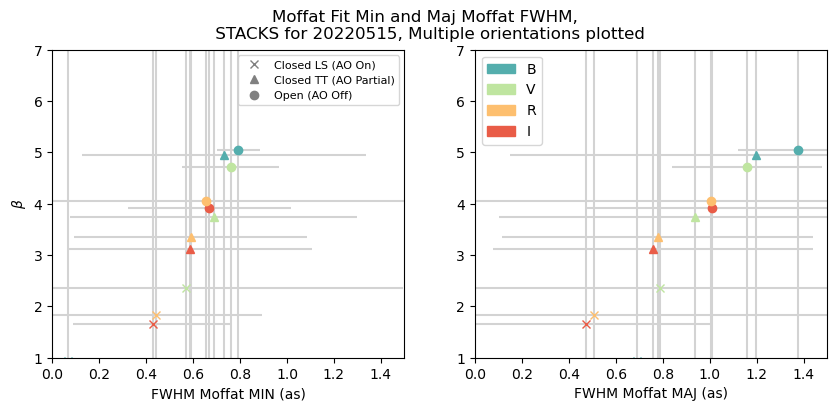

In [15]:
plot_redu.plot_fwhm_beta_4F_stack_sum(redu, c_keys = ["LS_c", "TT_c","_o"])

### Jitter: Difference between MIN and MAJ
Here we look at the impact of jitter by comparing major and minor axes

['IVBR']


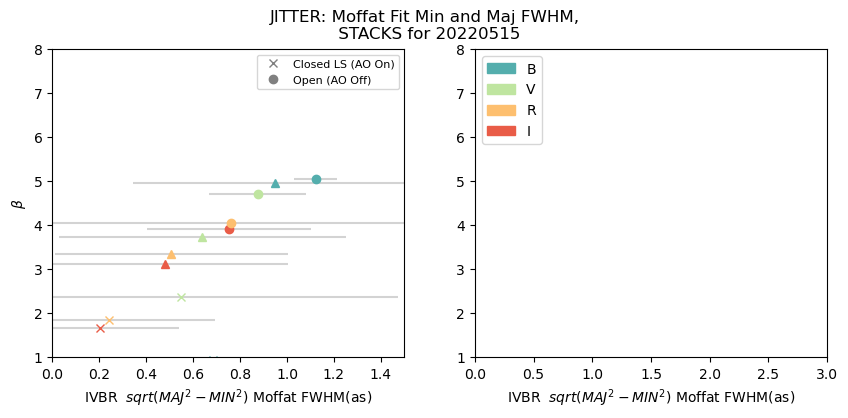

In [49]:
plot_redu.plot_jitter_4F_stack_sum(redu, c_keys = ["LS_c", "_o"], ylim=[1,8])

### FA vs. FWHM
Here we want to know how the seperation from center affects FWHM from the stacked image starlists. 

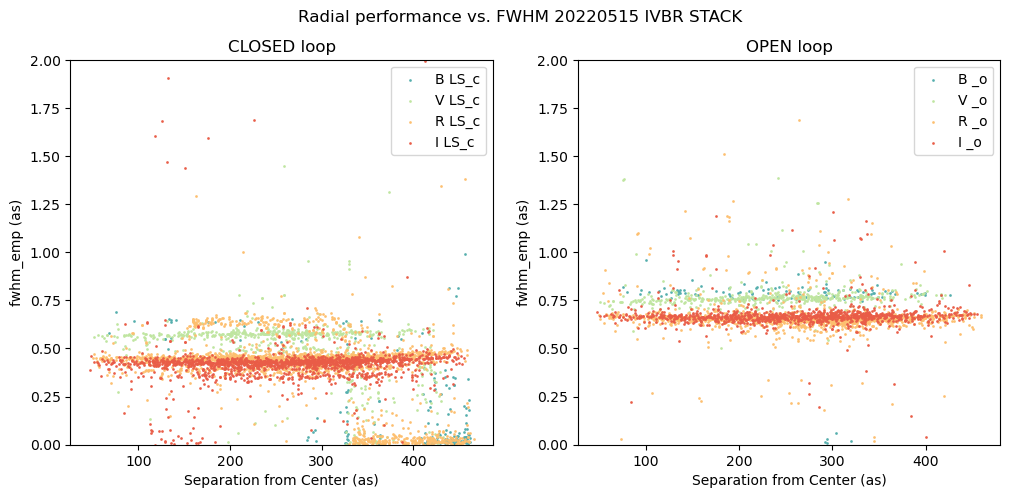

In [17]:
plot_redu.plot_fwhm_sep_4F_stacks(redu, c_key = 'LS_c', odr ='IVBR')

## 1.2. Plot: Stats Stacking

This plots various stats wrt frame number. Edits have been made to show 4F data more intelligently.

List of plots shown:

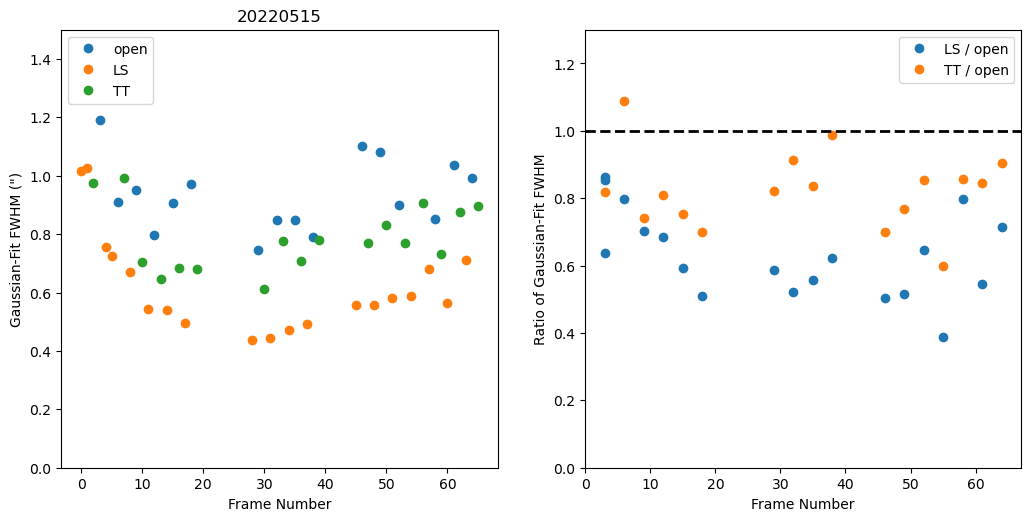

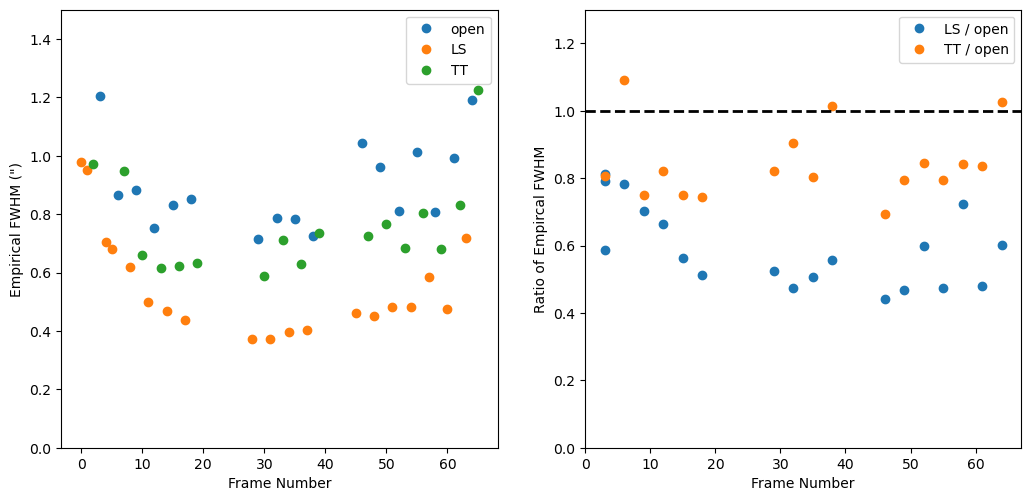

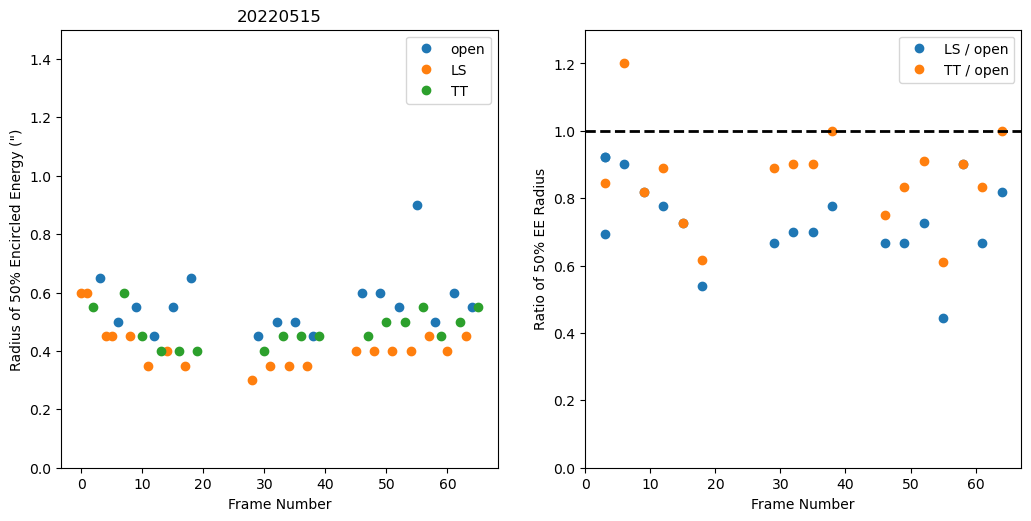

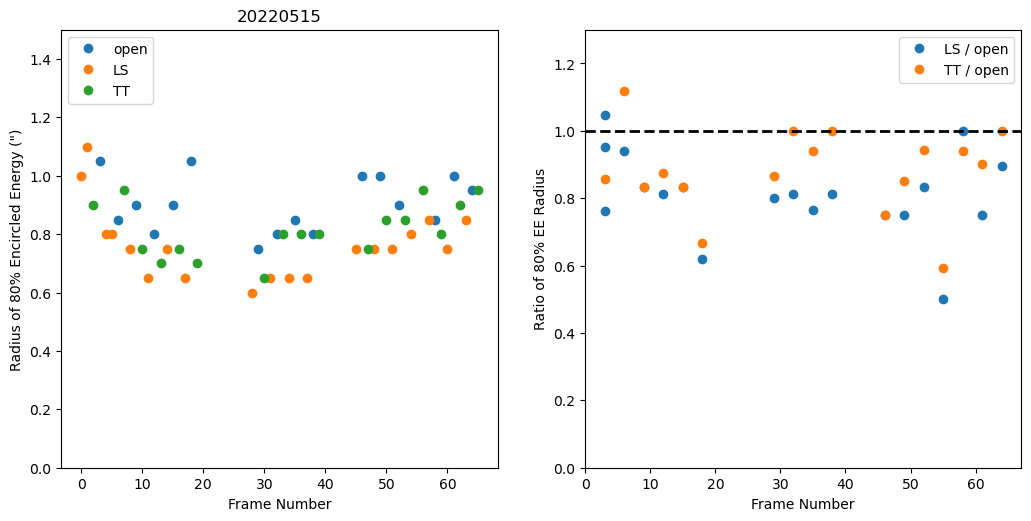

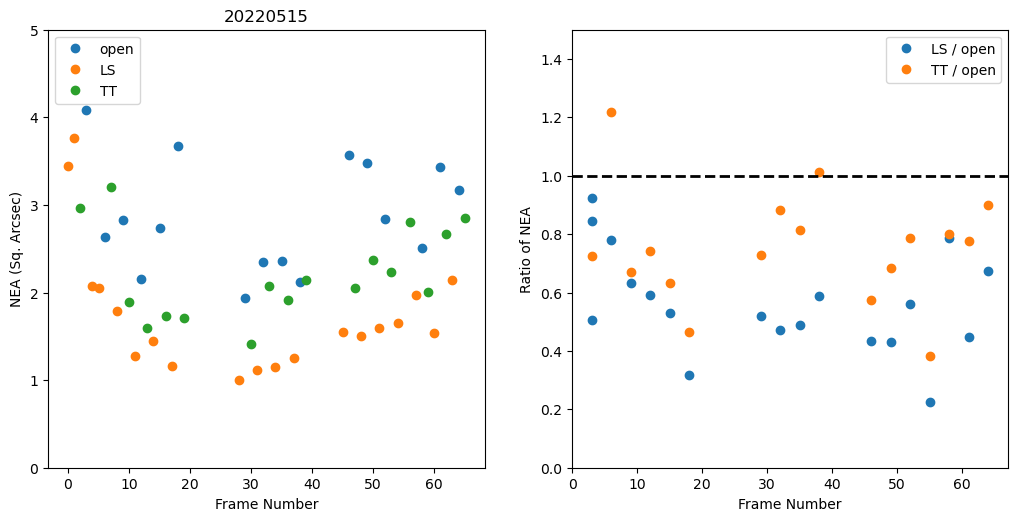

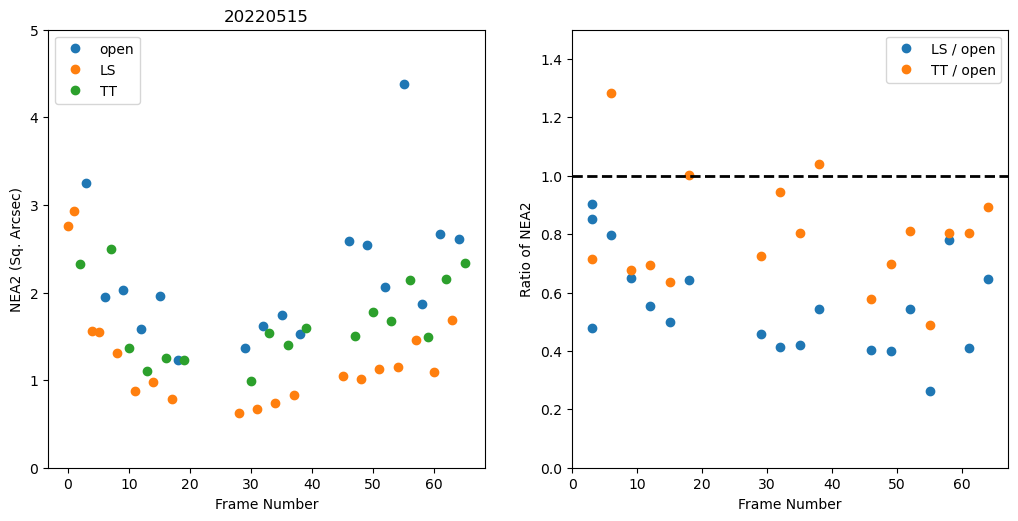

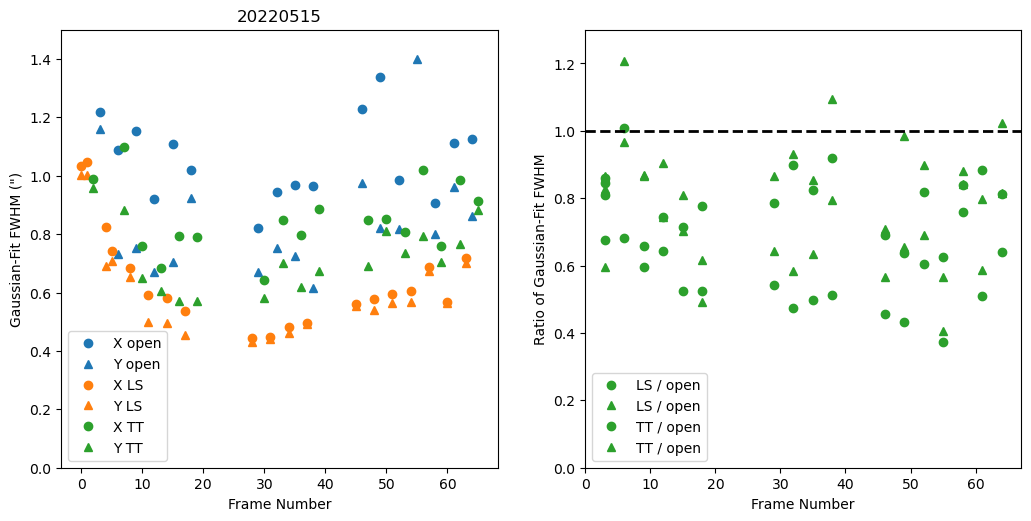

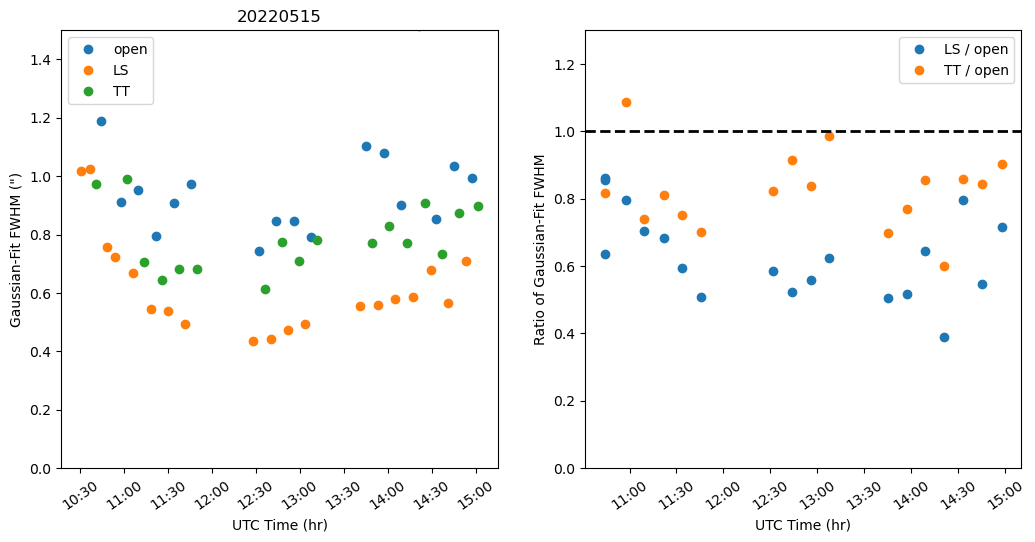

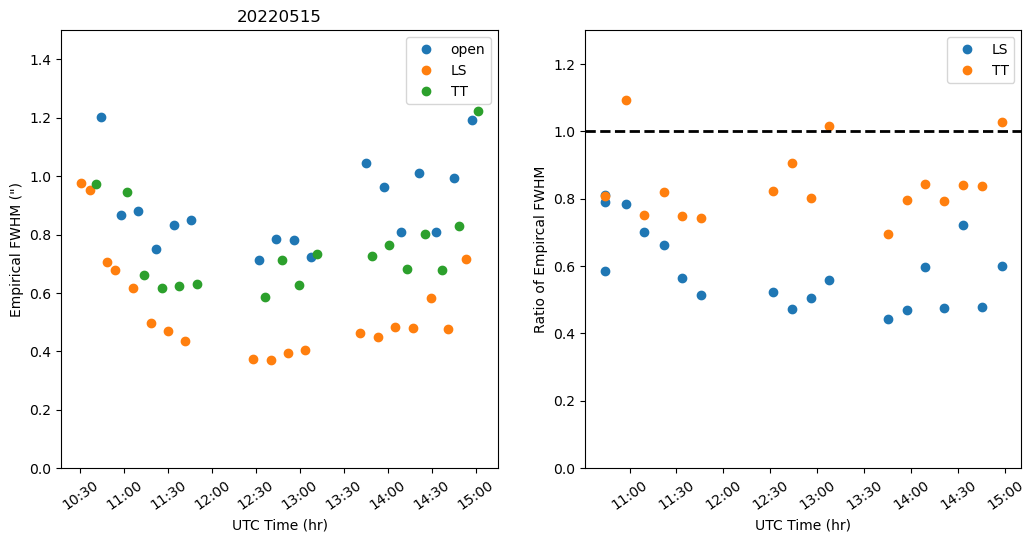

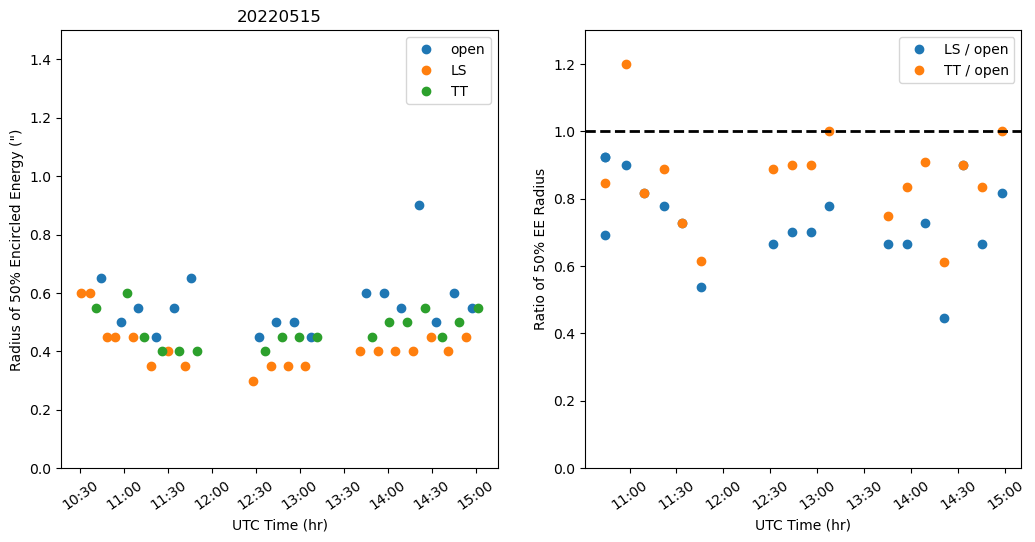

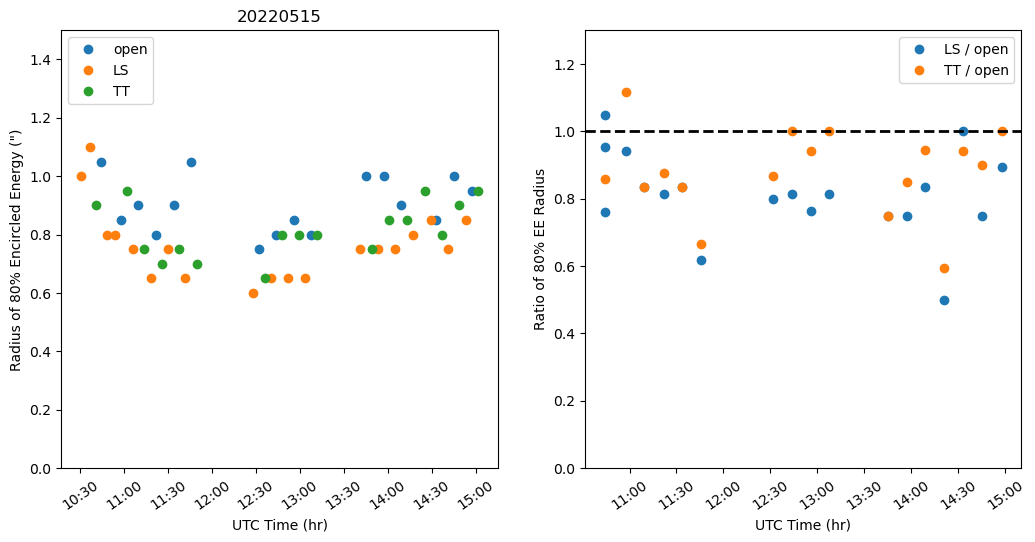

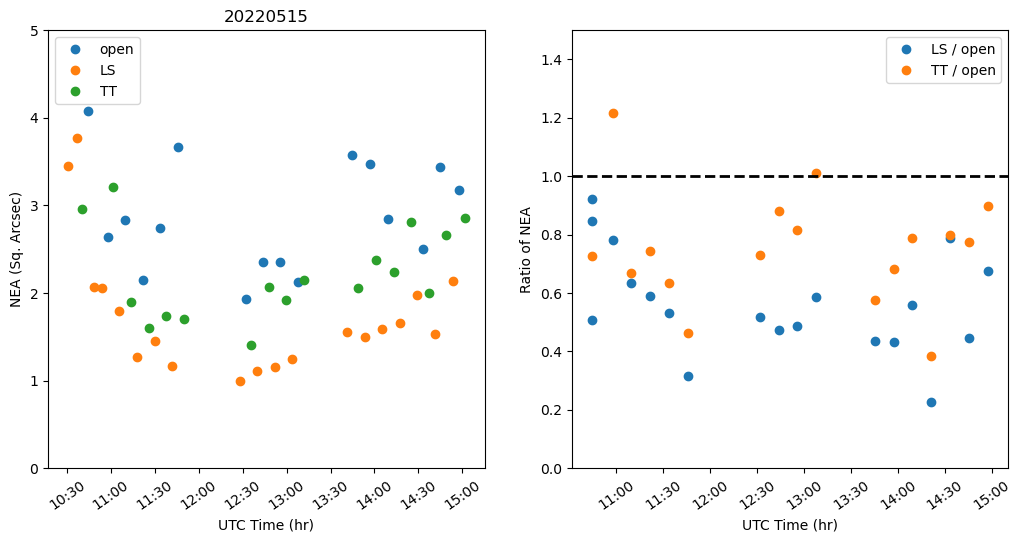

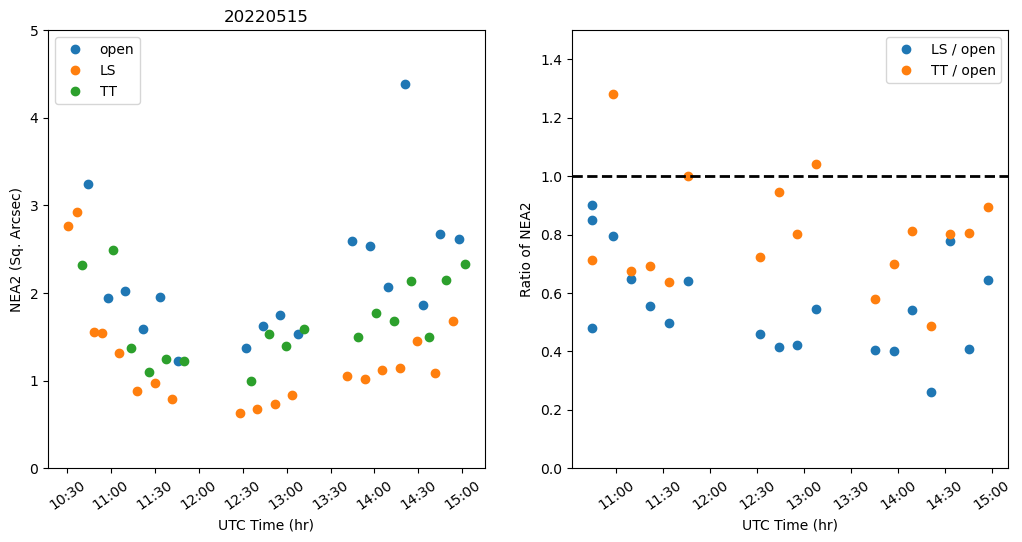

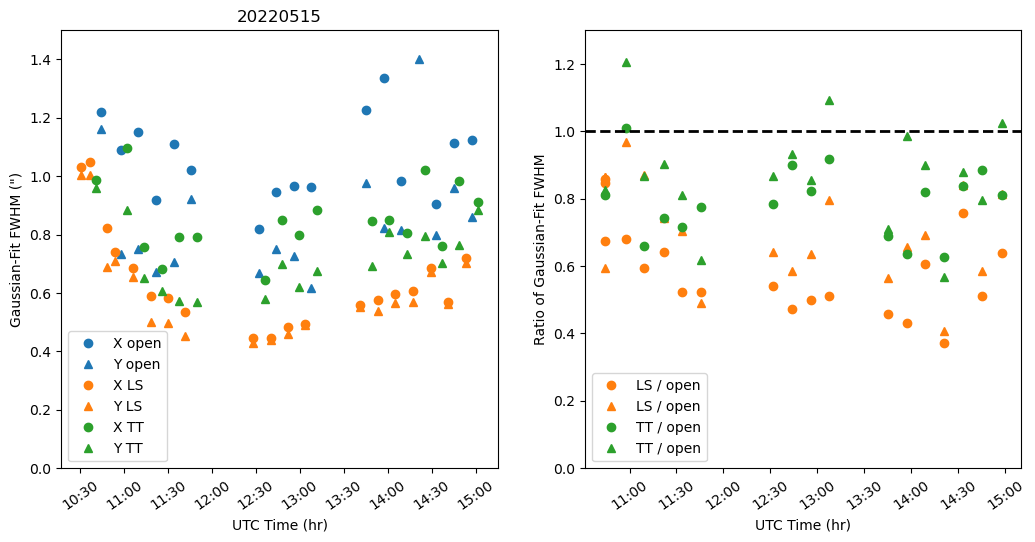

In [43]:
## Must have completed stats
suffixes = list(redu.dict_suffix.keys())
suffixes = ['open','LS', 'TT']
plot_stats.plot_stack_stats(night, suffixes, root_dir=root_dir + '../../', reduce_dir='sta/reduce/')
plt.show()

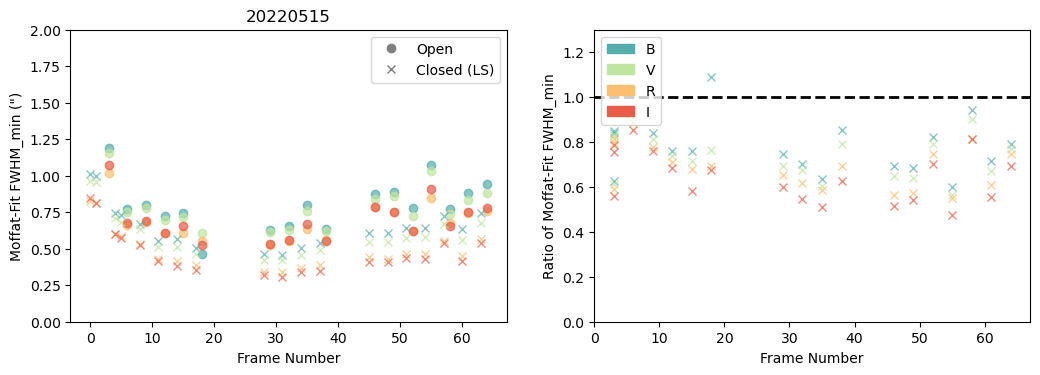

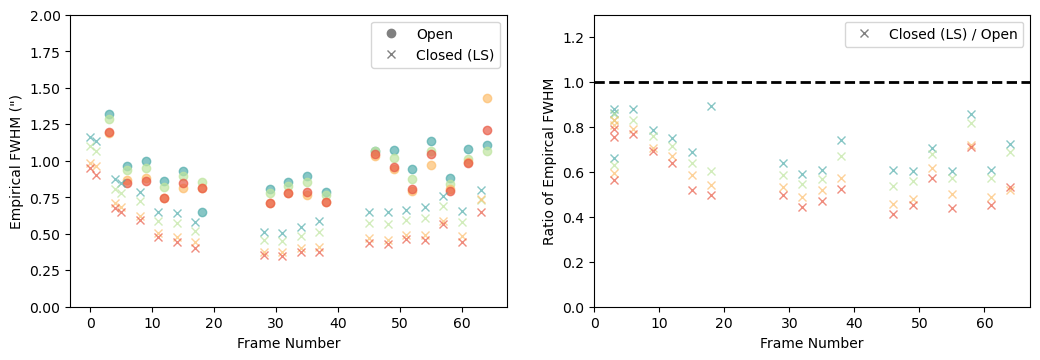

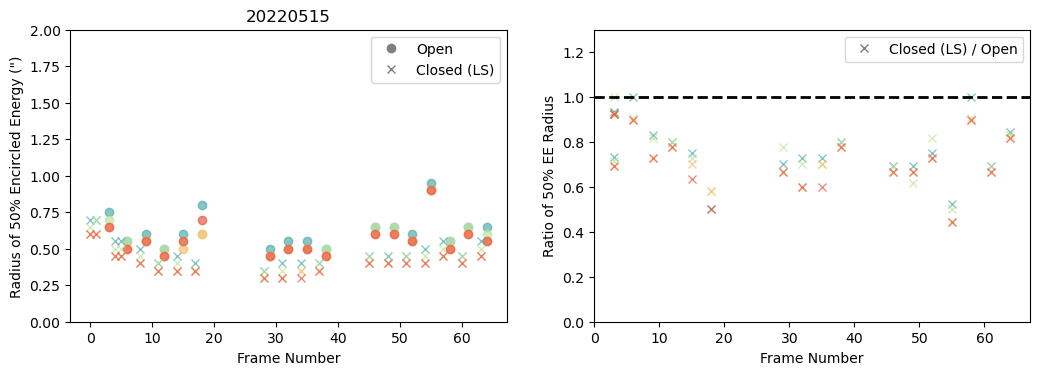

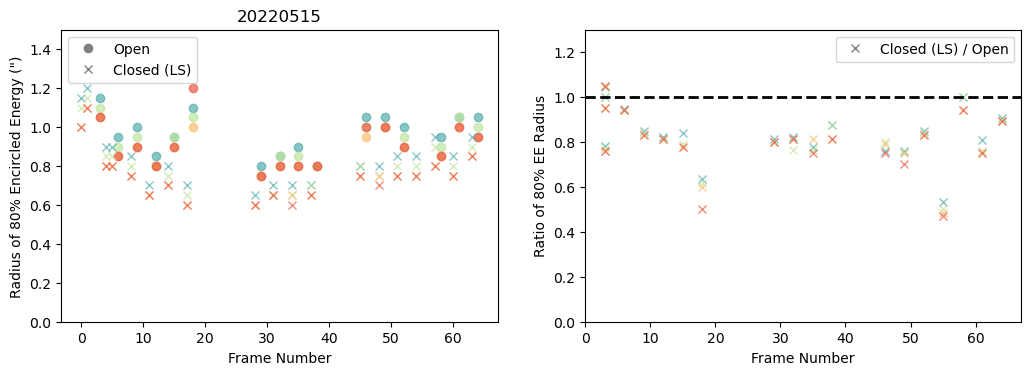

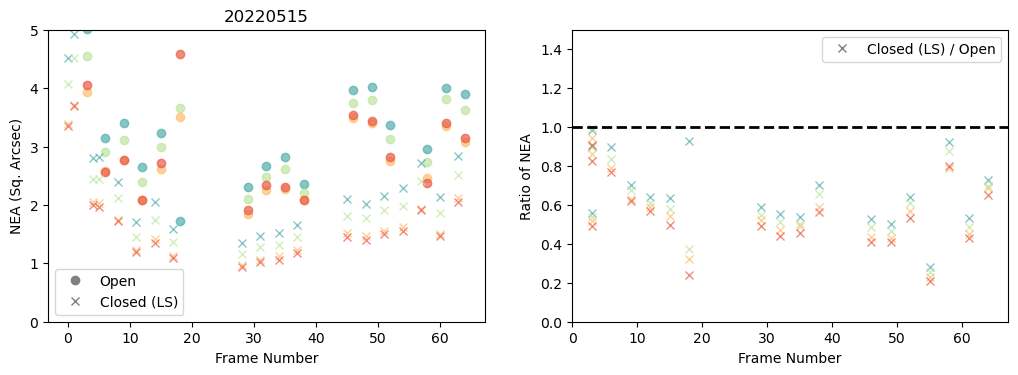

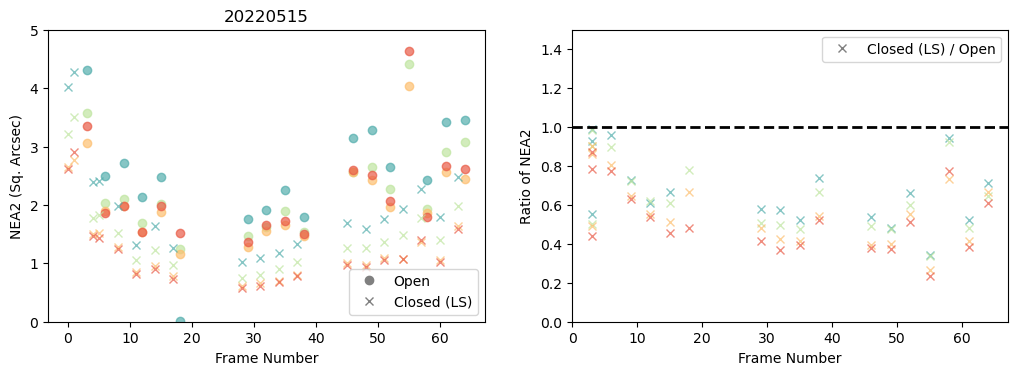

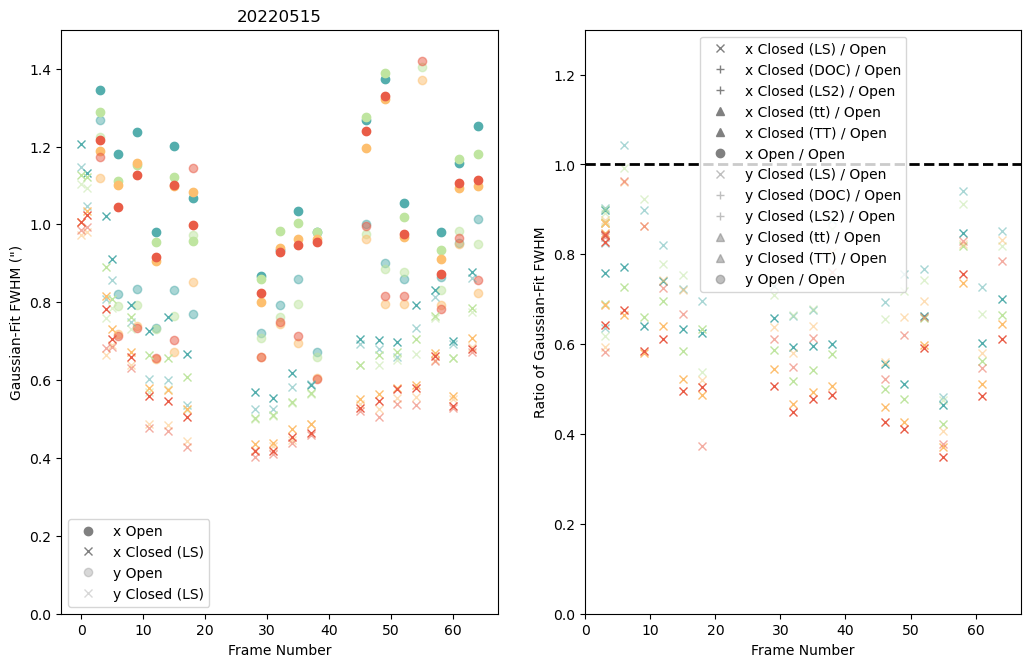

In [44]:
reload(plot_redu)
suffixes = ['_o', 'LS_c']
plot_redu.plot_stack_stats_4F_frame(night, suffixes, root_dir=root_dir + '../../', reduce_dir='sta/reduce/')
plt.show()

# 2. Aggregate Plots

## 2.1. Plot: Time Variation w/MASS-DIMM

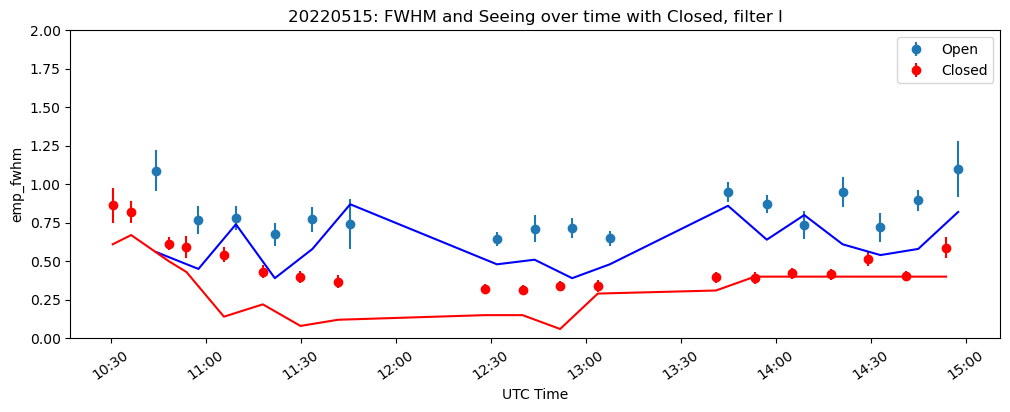

In [24]:
filt = "I"
wav = 806

open_file = f"{stats_dir}stats__o_{filt}_mdp.fits"
closed_file1 = f"{stats_dir}stats_LS_c_{filt}_mdp.fits"
plot_redu.plot_fwhmvt_nomatch_filt(open_file, closed_file1, 'emp_fwhm', f"{night}: FWHM and Seeing over time with Closed, filter {filt}", plots_dir, wav)

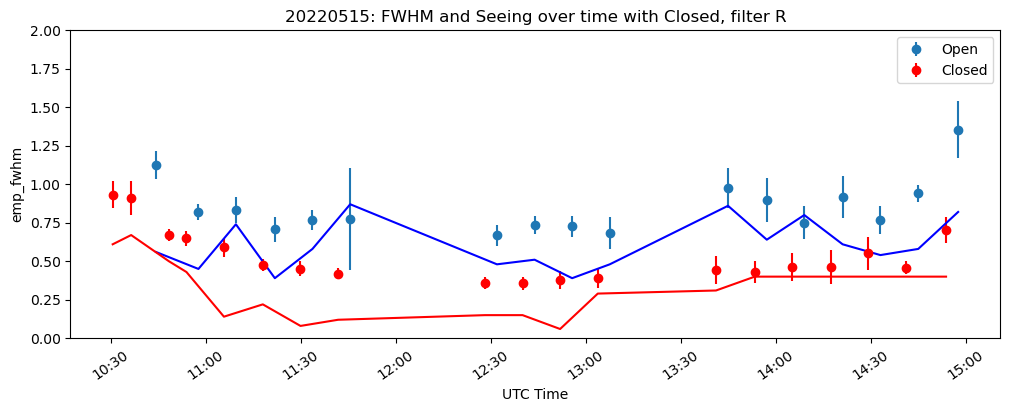

In [25]:
filt = "R"
wav = 658

open_file = f"{stats_dir}stats__o_{filt}_mdp.fits"
closed_file1 = f"{stats_dir}stats_LS_c_{filt}_mdp.fits"
plot_redu.plot_fwhmvt_nomatch_filt(open_file, closed_file1, 'emp_fwhm', f"{night}: FWHM and Seeing over time with Closed, filter {filt}", plots_dir, wav)

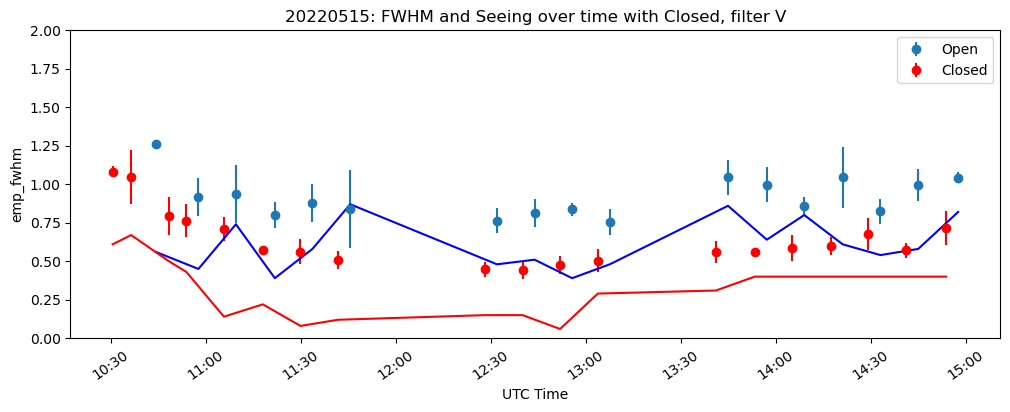

In [26]:
filt = "V"
wav = 551

open_file = f"{stats_dir}stats__o_{filt}_mdp.fits"
closed_file1 = f"{stats_dir}stats_LS_c_{filt}_mdp.fits"
plot_redu.plot_fwhmvt_nomatch_filt(open_file, closed_file1, 'emp_fwhm', f"{night}: FWHM and Seeing over time with Closed, filter {filt}", plots_dir, wav)

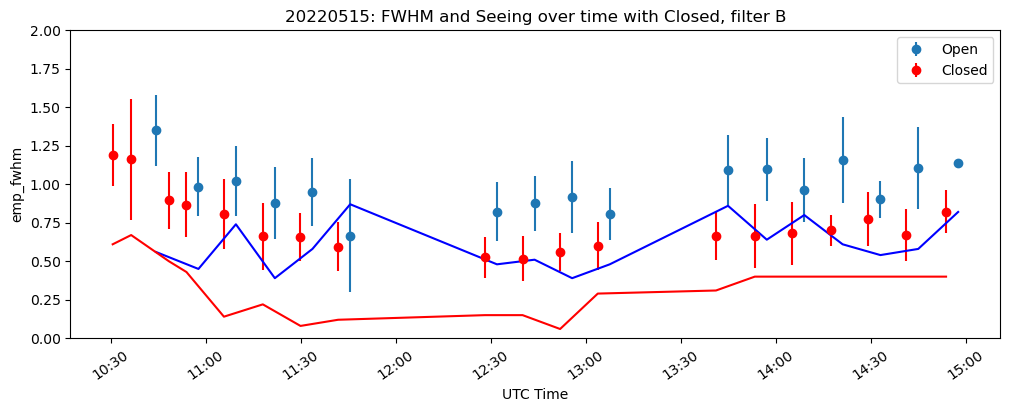

In [27]:
filt = "B"
wav = 445

open_file = f"{stats_dir}stats__o_{filt}_mdp.fits"
closed_file1 = f"{stats_dir}stats_LS_c_{filt}_mdp.fits"
plot_redu.plot_fwhmvt_nomatch_filt(open_file, closed_file1, 'emp_fwhm', f"{night}: FWHM and Seeing over time with Closed, filter {filt}", plots_dir, wav)

In [69]:
list(redu.dict_suffix.keys())

['open_BRIV', 'LS_BRIV', 'docz_BRIV', 'open_RIVB', 'LS_RIVB', 'docz_RIVB']

## 2.2. Plot: CDF of Moffat FWHM

This fuction takes in files, and for each, calculates a FWHM. The minor and major axises are then plotted.

Plate scale is not hard-coded or mentioned... not sure why this pixel scale is off yet [TODO]

/g/lu/data/imaka/onaga/20220515/sta/reduce/stats/stats__o_B.fits
/g/lu/data/imaka/onaga/20220515/sta/reduce/stats/stats_LS_c_B.fits


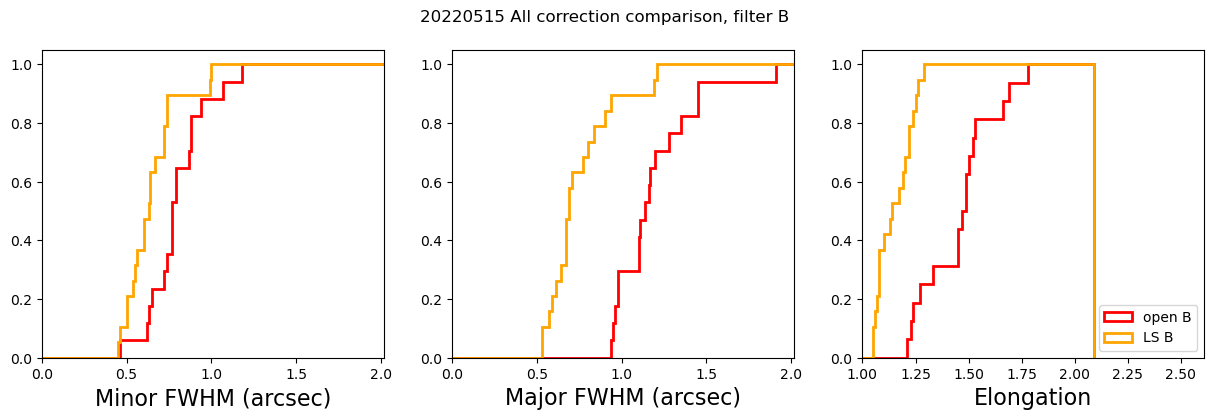

In [28]:
f_band = "B"

files = [f"{stats_dir}stats__o_{f_band}.fits", f"{stats_dir}stats_LS_c_{f_band}.fits"]
labels = ['open '+ f_band, 'LS ' + f_band]
colors = ['red', 'orange', 'green', 'blue', 'lightgreen', 'cyan']
plot_stats.comp_cdf(files, labels, colors)
plt.suptitle(f"{night} All correction comparison, filter {f_band}")
plt.show()

/g/lu/data/imaka/onaga/20220515/sta/reduce/stats/stats__o_B.fits
/g/lu/data/imaka/onaga/20220515/sta/reduce/stats/stats__o_V.fits
/g/lu/data/imaka/onaga/20220515/sta/reduce/stats/stats__o_R.fits
/g/lu/data/imaka/onaga/20220515/sta/reduce/stats/stats__o_I.fits


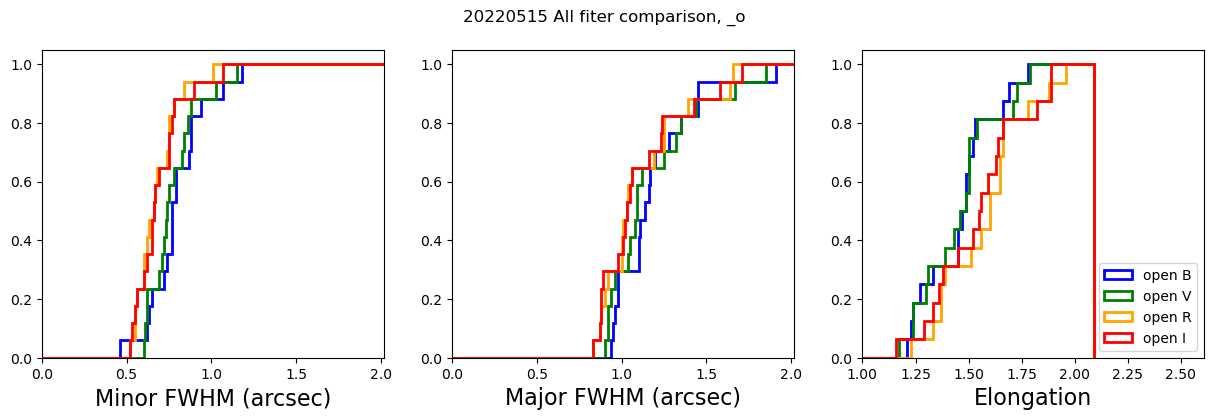

In [29]:
suff = "_o"

files = [f"{stats_dir}stats_{suff}_B.fits", f"{stats_dir}stats_{suff}_V.fits", f"{stats_dir}stats_{suff}_R.fits",f"{stats_dir}stats_{suff}_I.fits"]
labels = ['open B', 'open V', 'open R', 'open I']
colors = ['blue', 'green', 'orange', 'red']
plot_stats.comp_cdf(files, labels, colors)
plt.suptitle(f"{night} All fiter comparison, {suff}")
plt.show()

/g/lu/data/imaka/onaga/20220515/sta/reduce/stats/stats_LS_c_B.fits
/g/lu/data/imaka/onaga/20220515/sta/reduce/stats/stats_LS_c_V.fits
/g/lu/data/imaka/onaga/20220515/sta/reduce/stats/stats_LS_c_R.fits
/g/lu/data/imaka/onaga/20220515/sta/reduce/stats/stats_LS_c_I.fits


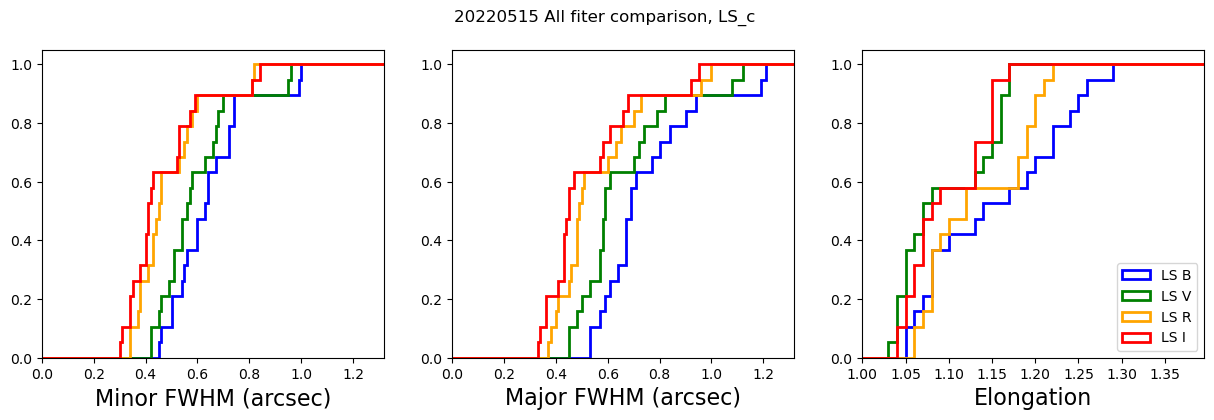

In [30]:
suff = "LS_c"

files = [f"{stats_dir}stats_{suff}_B.fits", f"{stats_dir}stats_{suff}_V.fits", f"{stats_dir}stats_{suff}_R.fits",f"{stats_dir}stats_{suff}_I.fits"]
labels = ['LS B', 'LS V', 'LS R', 'LS I']
colors = ['blue', 'green', 'orange', 'red']
plot_stats.comp_cdf(files, labels, colors)
plt.suptitle(f"{night} All fiter comparison, {suff}")
plt.show()

# 3. Four Filter Analysis Plots

In [31]:
from imaka.analysis import fourfilt
root = stats_dir

files_c = [root+"stats_LS_c_B.fits", root+"stats_LS_c_V.fits", root+"stats_LS_c_R.fits", root+"stats_LS_c_I.fits"]
files_o = [root+"stats__o_B.fits", root+"stats__o_V.fits", root+"stats__o_R.fits", root+"stats__o_I.fits"]
wav = [445, 551, 658, 806]
fourfilt.stack_all(table_list, open_close_list, filter_list)
# not 100% sure how to use this one...

NameError: name 'table_list' is not defined

## 3.1. Plot: 4F Correction Factor

Near-simeltaneous AO-off and AO-on data in each filter shows the variation in amount of correction with changing wavelength. 

What is plotted? Median FWHM \* ps for the listed files. Done for moffat FWHM. The original Function in fourfilt.py seems to be recomputing the moffat FWHM...
- Left: Performance for AO-off (blue) and AO-on (red), showing minor FWHM (circles) and major FWHM (squares) at each observation band.
- Right: Ratio of AO-off to AO-on FWHM for each filter, shown both for minor (circles) and major (squares) axes.

Plate scale (ps) was originally hard coded to 0.12





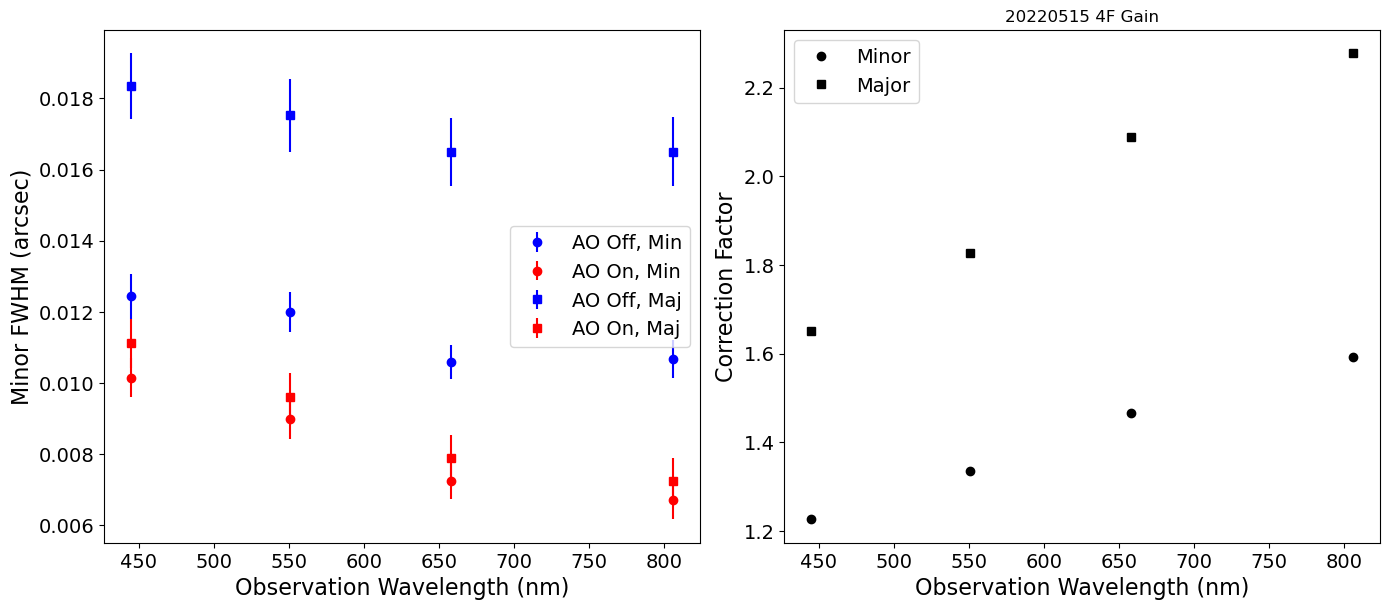

In [32]:
reload(fourfilt)
fourfilt.plot_gain(files_o, files_c, ps = 0.063) 
plt.title(f"{night} 4F Gain")
plt.show()

## 3.2. Plot: 4F Dependence Model
(Copied from four filter Analysis.ipynb)

GLAO correction is expected to be a function of wavelength. The figure below shows median minor FWHM at variuos wavelengths for AO-off (blue) and AO-on (red) data.  The data have been fit to a power-law model of the form: $f(x)=A(\frac{x}{x_o})^{-\alpha}$

With $A$, $x_o$, and $\alpha$ as free parameters

Each data set is shown in circle points with errorbars, with the best fit model (weighted with uncertainties) in solid lines. The corresponding $\alpha$ and $\chi^2$ are shown in the same color as the matching data set. In this case, the chi squared is the same as the reduced chi squared (4 data points - 3 free parameters = 1 degree of freedom).


χ$^2$=1.55
χ$^2$=0.94
α=0.3
α=0.75


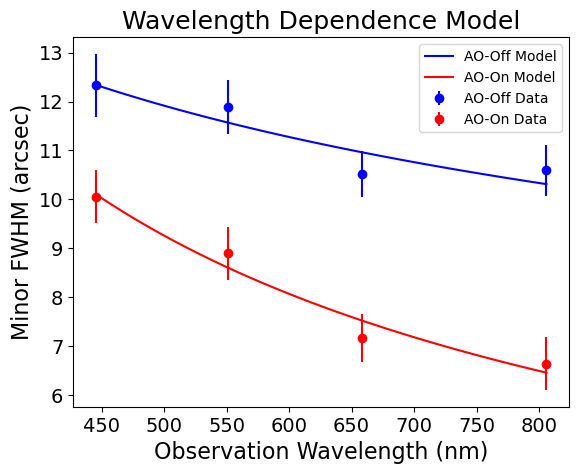

In [33]:
reload(fourfilt)
fourfilt.power_model(files_o, files_c, ps=1.0)

In [ ]:
# alpha and beta as a function of wavelength

# Field Variability

In [19]:
from importlib import reload
reload(plot_stats)

<module 'imaka.analysis.plot_stats' from '/u/eden/code/imaka/imaka/analysis/plot_stats.py'>

In [38]:
# pick a file based on key
key = 'LS' #'LS_3new'
i = 10
#####
img_num = redu.dict_images[key]
suf = redu.dict_suffix[key]
test_img_base = 'sta{img:03d}{suf:s}_scan'.format(img=img_num[i], suf=suf)

### Single exposure examples

sta034LS_c_scan
Median FWHM           = 0.363"
Median FWHM (clipped) = 0.363"
Mean FWHM             = 3794.163"
Mean FWHM (clipped)   = 0.375"
Stddev FWHM           = 185499.884"
Stddev FWHM (clipped) = 0.048"


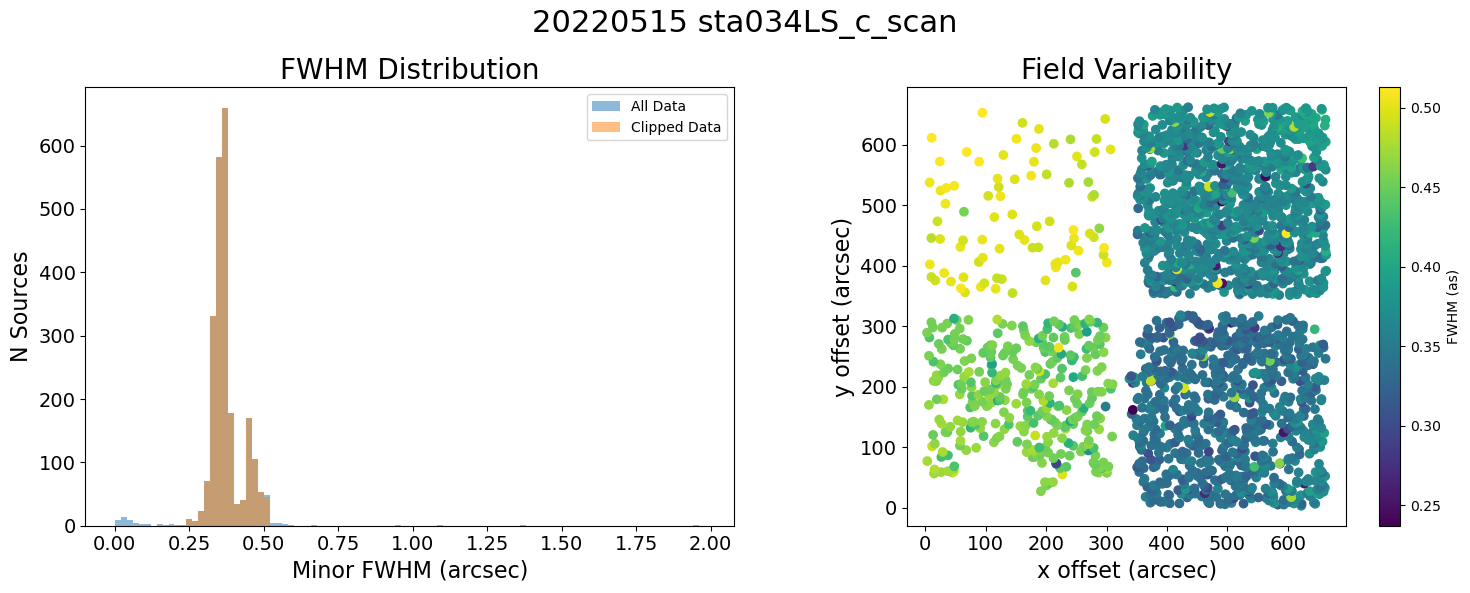

In [39]:
#test_img_base = "sta133LS_c_scan"
print(test_img_base)
img_file = root_dir + 'reduce/Fld2/' + test_img_base + '_clean.fits'
starlist = root_dir + 'reduce/Fld2/' + test_img_base + '_clean_stars_stats_mdp.fits'
plot_stats.plot_var(img_file, starlist, night +" "+ test_img_base )

sta046_o_scan
Median FWHM           = 0.797"
Median FWHM (clipped) = 0.797"
Mean FWHM             = 0.801"
Mean FWHM (clipped)   = 0.804"
Stddev FWHM           = 0.235"
Stddev FWHM (clipped) = 0.039"


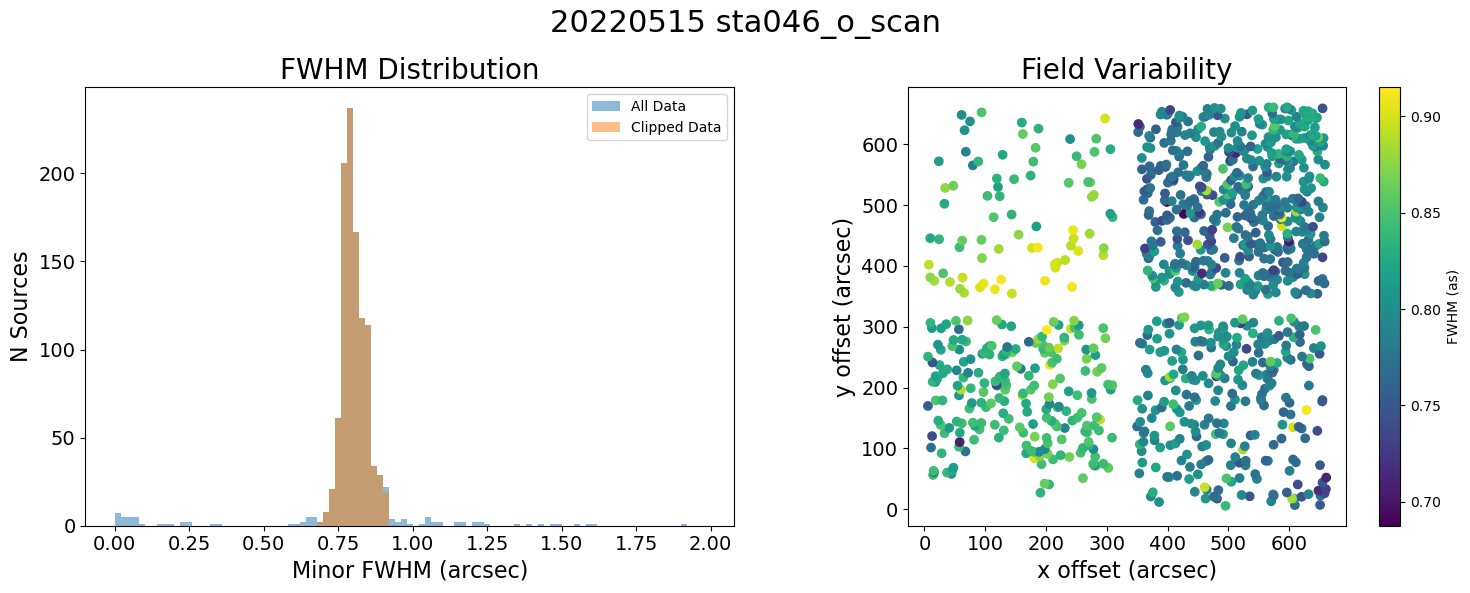

In [37]:
#test_img_base = "sta147_o_scan"
print(test_img_base)
img_file = root_dir + 'reduce/Fld2/' + test_img_base + '_clean.fits'
starlist = root_dir + 'reduce/Fld2/' + test_img_base + '_clean_stars_stats_mdp.fits'
plot_stats.plot_var(img_file, starlist, night +" "+ test_img_base)

### Open Loop

Median FWHM           = 0.664"
Median FWHM (clipped) = 0.663"
Mean FWHM             = 0.759"
Mean FWHM (clipped)   = 0.677"
Stddev FWHM           = 1.717"
Stddev FWHM (clipped) = 0.050"


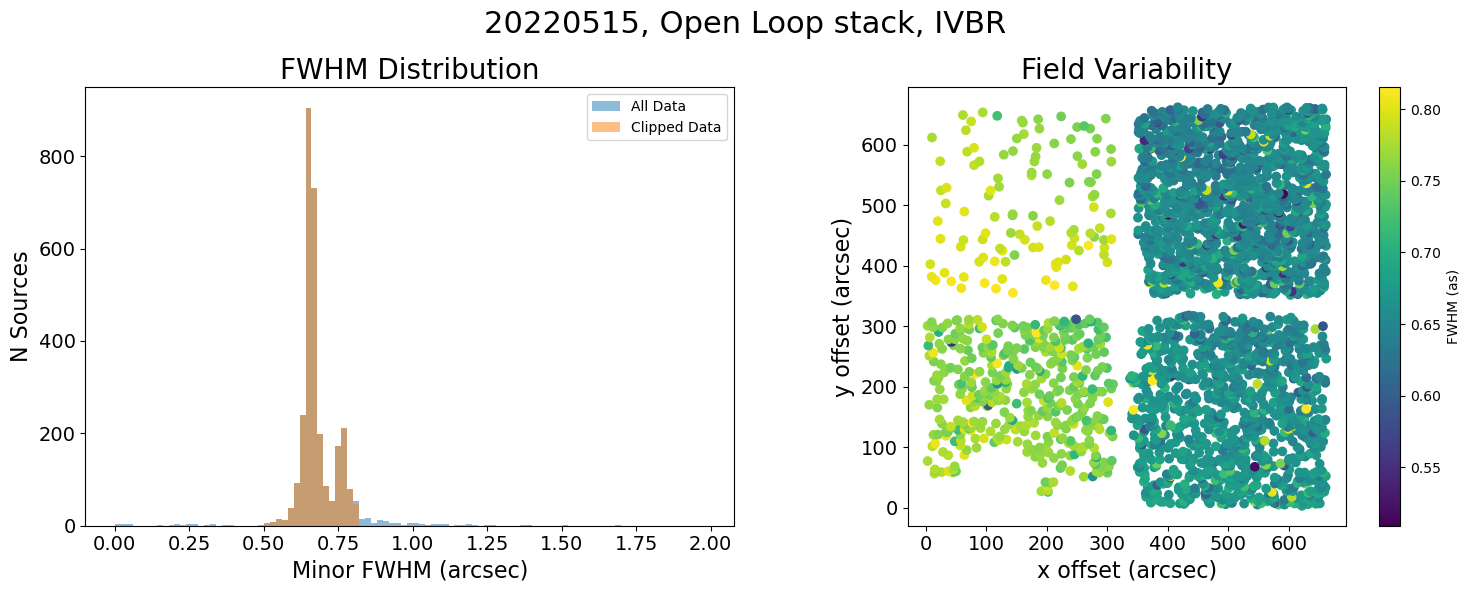

In [40]:
filt = 'IVBR'
img_file = stack_dir + f'fld2_stack__o_{filt}.fits' 
starlist = stack_dir + f'fld2_stack__o_{filt}_stars_stats_mdp.fits' 
plot_stats.plot_var(img_file, starlist, f"{night}, Open Loop stack, {filt}")

### Closed (LS)

Median FWHM           = 0.440"
Median FWHM (clipped) = 0.440"
Mean FWHM             = 87.879"
Mean FWHM (clipped)   = 0.413"
Stddev FWHM           = 5789.179"
Stddev FWHM (clipped) = 0.149"


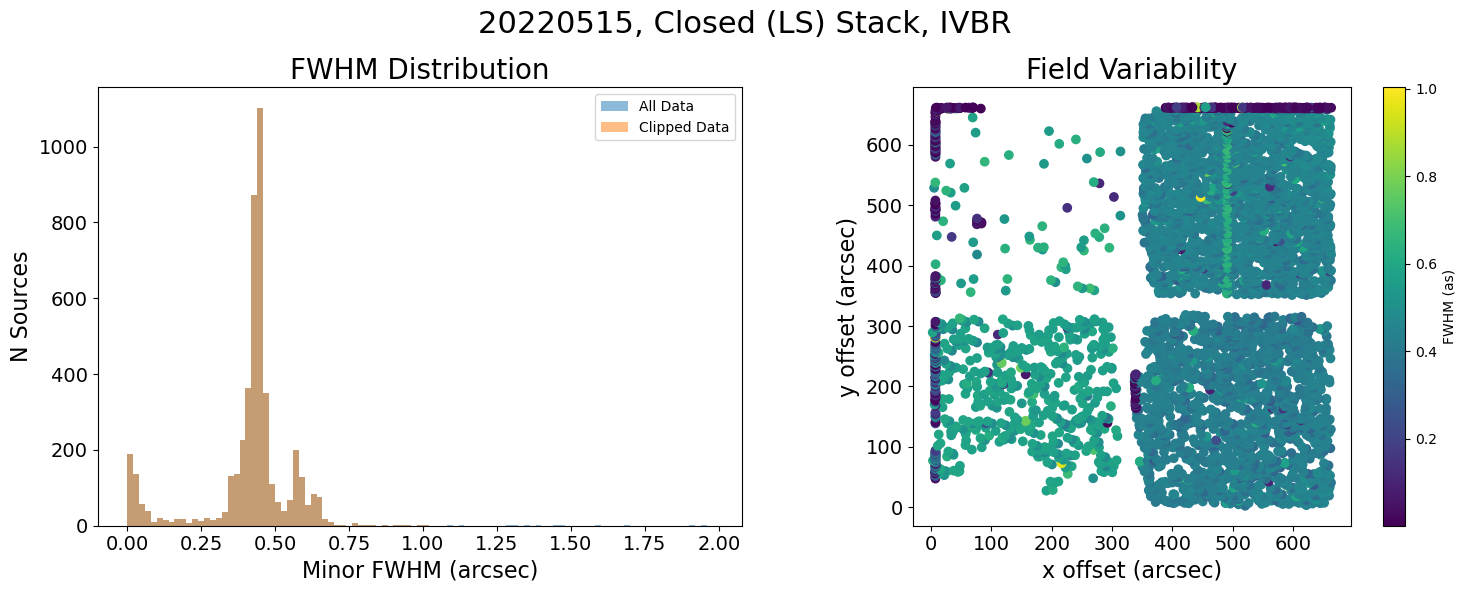

In [41]:
filt = 'IVBR'
img_file = stack_dir + f'fld2_stack_LS_c_{filt}.fits' 
starlist = stack_dir + f'fld2_stack_LS_c_{filt}_stars_stats_mdp.fits' 
plot_stats.plot_var(img_file, starlist, f"{night}, Closed (LS) Stack, {filt}")

# Ect: Flats

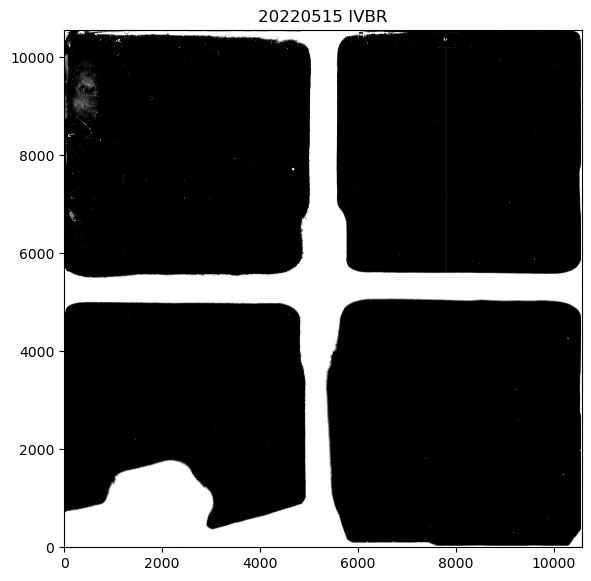

In [47]:
## What masks are we using? how are they different between orientations?
filt = 'IVBR'
data = fits.open(redu.calib_dir +  f"mask_{filt}.fits")[0].data

fig = plt.figure(figsize=(6,6))
plt.title(f"{redu.night} {filt}")
im = plt.imshow(data, origin ='lower', cmap='gray')
plt.tight_layout()
plt.show()